In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [13]:
# Questão 1: Qual o tipo de dado da coluna "peak-rpm"?
print(df["peak-rpm"].dtype)

float64


In [14]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [15]:
# Questão 2: Ache a correlação entre as seguintes colunas: bore, stroke, compression-ratio e horsepower.
# Dica: Se você quiser selecionar essas colunas, use a seguinte sintaxe: df[['bore', 'stroke','compression-ratio','horsepower']]

df[['bore', 'stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53317.01370557367)

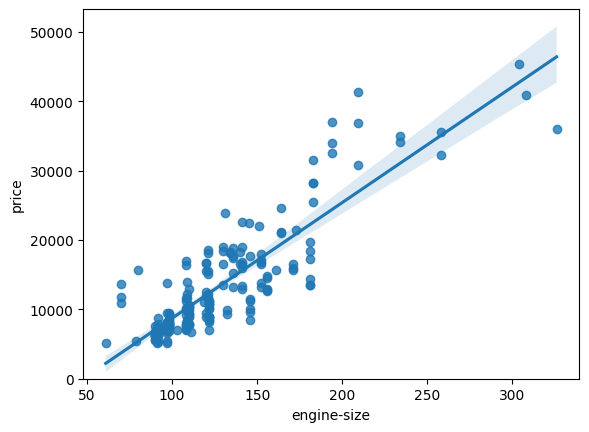

In [17]:
# Relação linear positiva
# Verificando "engine size" como um possível preditor da variável 'price'

sns.regplot(x="engine-size", y='price', data=df)
plt.ylim(0,)

In [18]:
# Verificando a correlação entre as duas variáveis
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

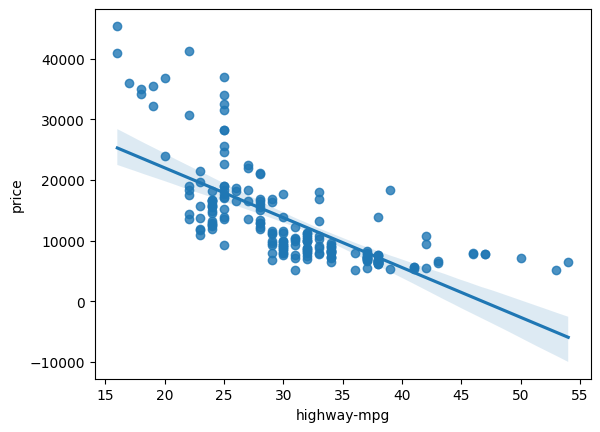

In [19]:
# Correlação entre "highway-mpg" e "price"
sns.regplot(x="highway-mpg", y="price", data=df)

In [21]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000
